# Tarea 5

**Envío del PR inicial:** 15 de octubre

**Aceptación del PR:** 21 de octubre

NOTA: Esta tarea debe entregarse en equipo.

In [1]:
include("Mapeos.jl")
include("AutoDiff.jl")

AutoDiff

In [2]:
using Plots

In [3]:
using .Mapeos
using .AutoDiff

In [4]:
function newton_dual(f, guess; n_iter=1000)
    xnn = dual(guess)
    for i in 1:n_iter
        xnn = xnn.x - (f(xnn).x / f(xnn).x′)
        xnn = dual(xnn)
    end
    return xnn.x
end

newton_dual (generic function with 1 method)

In [5]:
Qc(x, c) = x^2 + c

Qc (generic function with 1 method)

In [6]:
fₙ(cn) = (cn[1] - cn[2]) / (cn[2] - cn[3])

fₙ (generic function with 1 method)

In [7]:
function compone(f, x, n)
    n_comp = x
    for i in 1:n
        n_comp = f(n_comp)
    end
    return n_comp
end

compone (generic function with 1 method)

## 1

Llamemos $c_n$ el valor del parámetro $c$ donde ocurre la bifurcación de doblamiento de periodo para el mapeo $Q_c(x)=x^2+c$, donde la órbita de periodo $2^n$ nace. Como hemos visto en notebooks anteriores, tenemos que $c_0=1/4$ marca la aparición del atractor de periodo $2^0=1$, $c_1=-1/4$ corresponde a la aparición del atractor de periodo $2^1=2$, $c_2=-3/4$ a la aparición del atractor de periodo $2^2=4$, etc. 

A partir de estos valores y otros que calcularán (al menos deben encontrar $c_6$), definimos la secuencia: $\{f_0, f_1, f_2, \dots\}$, donde

\begin{equation}
f_n = \frac{c_n-c_{n+1}}{c_{n+1}-c_{n+2}} .
\end{equation}

La pregunta es, ¿a qué valor converge esta secuencia?, es decir, dar una estimación de $f_\infty$.


*Hint:* Para realizar este ejercicio deben calcular el atractor para varios valores de $c$, de tal manera que puedan aislar las órbitas de periodo $2^p$ y de ahí determinar varios valores $c_n$. Se requerir suficiente cuidado para obtener una buena aproximación de $c_n$. 
Una opción se basa en recordar/usar que las bifurcaciones de doblamiento de periodo ocurren cuando los puntos de la órbita de periodo $p$ se tornan en repulsores, es decir, $(Q_c^p)'(x)=-1$. Esta opción, entonces, involucra obtener los valores $c_n$ a partir de órbitas periódicas de periodo $2^n$ usando los polinomios $Q_c^{2^p}(x)$ y diferenciación automática.

In [8]:
function calcula_cₙ(Fλ, rango_c, n; x0=0., ϵ=0.01, n_iter=1000, x0prev=false)
    cn = []
    deltas = []
    ders = []
    for c in rango_c
        F = x -> Fλ(x, c)
        m = Mapeo(F, x0, n_iter)
        atr = dual(m.xnn[end])
        der = compone(F, atr, Int(2^n)).x′
        δ = abs(der + 1)
        if δ < ϵ
            push!(cn, c)
            push!(ders, der)
            push!(deltas, δ)
        end
        if x0prev x0 = atr.x end
    end
    if !isempty(deltas)
        _, ind = findmin(deltas)
        return cn[ind]
    else
        return nothing
    end
end

calcula_cₙ (generic function with 1 method)

El anterior codigo busca la bifuracion de periodo $2^n$ en el intervalo `rango_c`, entonces busquemos uno a uno estos puntos.

Por completez, encontremos veamos que esto encuentra al primer punto de bifuracion de doblamiento de periodo $c_n=-3/4$.

In [9]:
rango_c = reverse(-1.5:1e-2:-1/2.)

-0.5:-0.01:-1.5

In [10]:
c_1 = calcula_cₙ(Qc, rango_c, 0, n_iter=1000, x0prev=true)

-0.75

Continuemos la busqueda tomando intervalos cada vez mas chicos en el cual uno de los extremos es la $c_n$ encontrada previamente.

In [11]:
rango_c = reverse(-1.5:1e-3:c_1)
c_2 = calcula_cₙ(Qc, rango_c, 1, x0prev=true)

-1.25

In [12]:
rango_c = reverse(-1.4:1e-4:c_2)
c_3 = calcula_cₙ(Qc, rango_c, 2, x0prev=true)

-1.3681

In [13]:
rango_c = reverse(-1.4:1e-4:c_3)
c_4 = calcula_cₙ(Qc, rango_c, 3, x0prev=true)

-1.394

In [14]:
rango_c = reverse(-1.5:1e-4:c_4)
c_5 = calcula_cₙ(Qc, rango_c, 4, x0prev=true)

-1.3996

In [15]:
rango_c = reverse(-1.5:1e-5:c_5)
c_6 = calcula_cₙ(Qc, rango_c, 5, x0prev=true)

-1.40083

In [16]:
rango_c = reverse(-1.5:1e-6:c_6)
c_7 = calcula_cₙ(Qc, rango_c, 6, x0prev=true)

-1.446791

In [17]:
# Busquemos este ultimo con mas fineza
rango_c = reverse((c_6-1e-3):1e-8:c_6)
c_7 = calcula_cₙ(Qc, rango_c, 6, x0prev=true)

-1.40108525

Entonces, los valores encontrados son los siguientes.

In [18]:
cn = [c_1, c_2, c_3, c_4, c_5, c_6, c_7]

7-element Array{Float64,1}:
 -0.75   
 -1.25   
 -1.3681 
 -1.394  
 -1.3996 
 -1.40083
 -1.40109

In [19]:
for (i, c) in enumerate(cn)
    println(i, "  ", c)
end

1  -0.75
2  -1.25
3  -1.3681
4  -1.394
5  -1.3996
6  -1.40083
7  -1.40108525


In [20]:
fₙ(cn[end-3:end-1])

4.552845528455086

## 2

Repitan el ejercicio anterior para el mapeo $S_c(x) = c \sin(x)$. 

- ¿Cómo se comparan los valores obtenidos de $f_n$? 

- ¿Qué interpretación le pueden dar a este resultado, en comparación del ejercicio anterior?

In [21]:
Sc(x, c) = c*sin(x)

Sc (generic function with 1 method)

In [22]:
pyplot()

Plots.PyPlotBackend()

In [23]:
rango_c = -10:0.005:10
Fs = [x -> Sc(x, c) for c in rango_c];

In [24]:
x₀ = 0.1
mapeos = [Mapeo(F, x₀, 1000) for F in Fs];

In [25]:
ps = [m.xnn[end-100:end] for m in mapeos];

In [26]:
cs = []
for c in rango_c
    for i in 1:101
        push!(cs, c)
    end
end

In [27]:
xn = []
for p in ps
    for x in p
        push!(xn, x)
    end
end

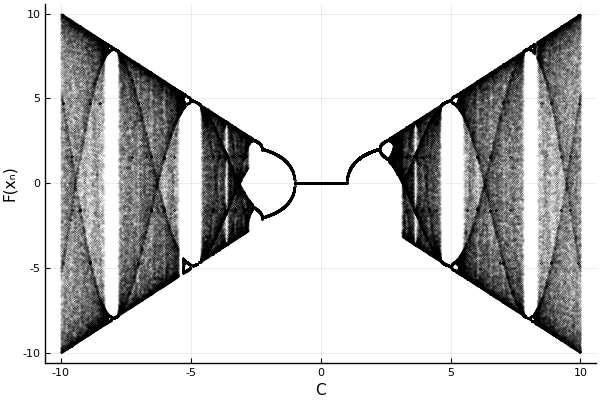

In [28]:
d1 = scatter(cs, xn, ms=0.05, legend=false)
xlabel!("C")
ylabel!("F(xₙ)")

In [29]:
rango_c = 0:0.001:5
Fs = [x -> Sc(x, c) for c in rango_c];

In [30]:
x₀ = 1
mapeos = [Mapeo(F, x₀, 1000) for F in Fs];

In [31]:
ps = [m.xnn[end-100:end] for m in mapeos];

In [32]:
cs = []
for c in rango_c
    for i in 1:101
        push!(cs, c)
    end
end

In [33]:
xn = []
for p in ps
    for x in p
        push!(xn, x)
    end
end

Se va a utilizar la "rama" derecha del diagrama de bifuracion como guia en la busqueda de los valores $c_n$.

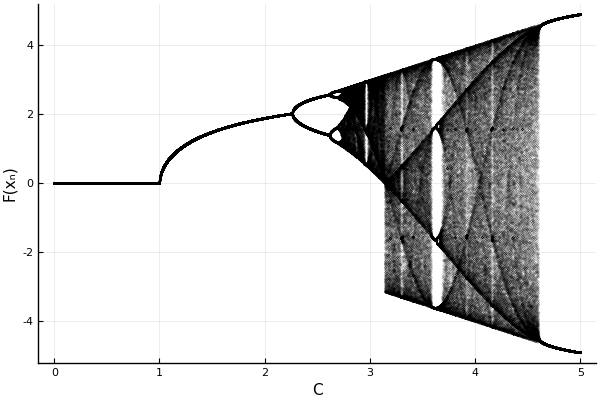

In [34]:
d1 = scatter(cs, xn, ms=0.05, legend=false)
xlabel!("C")
ylabel!("F(xₙ)")

In [35]:
m = Mapeo(x -> Sc(x, .7197), .5, 10_000);

In [36]:
rango_c = 0.1:0.001:2.6
c_21 = calcula_cₙ(Sc, rango_c, 0, x0=.1, ϵ=0.05, n_iter=10_000)

2.261

In [37]:
rango_c = c_21:1e-4:c_21+0.7
c_22 = calcula_cₙ(Sc, rango_c, 1, x0=.5, ϵ=0.05, n_iter=10_000)

2.6176

In [38]:
rango_c = c_22:1e-4:c_22+0.2
c_23 = calcula_cₙ(Sc, rango_c, 2, x0=0.5, ϵ=0.05, n_iter=10_000)

2.6973

In [39]:
rango_c = c_23:1e-5:c_23+0.03
c_24 = calcula_cₙ(Sc, rango_c, 3, x0=0.5, ϵ=0.01, n_iter=10_000)

2.7145799999999998

In [40]:
rango_c = c_24:1e-6:c_24+0.005
c_25 = calcula_cₙ(Sc, rango_c, 4, x0=0.5, ϵ=0.01, n_iter=10_000)

2.718285

In [41]:
rango_c = c_25:1e-8:c_25+0.0005
c_26 = calcula_cₙ(Sc, rango_c, 5, x0=0.5, ϵ=0.001, n_iter=10_000)

In [42]:
cn2 = [c_21, c_22, c_23, c_24, c_25, c_26]

6-element Array{Any,1}:
 2.261   
 2.6176  
 2.6973  
 2.71458 
 2.71828 
  nothing

In [43]:
println("El valor encontrado para fn con n=6, es: ", fₙ(cn2[3:5]))

El valor encontrado para fn con n=6, es: 4.663967611335935


## 3

Como se ve en la Fig. 1 del diagrama de bifurcaciones de $Q_c$, $x=0$ pertenece a un ciclo de periodo $2^n$ para ciertos valores $C_n$ del parámetro. Dichos valores son *especiales*, ya que el hecho de que $x=0$ pertenezca a un ciclo de periodo $2^n$ define los llamados *ciclos superestable*, donde tenemos $(Q^{2^p}_{C_n})'(0)=0$.

- ¿A qué converge la secuencia $f_n$, definida ahora a partir de los valores $C_n$.

- De los $2^p$ puntos del ciclo de periodo $2^p$, es decir, $\{0, p_1, \dots p_{2^{n-1}}\,\}$ hay uno (distinto del 0) cuya distancia a 0 es la menor; a esa distancia la identificaremos como $d_n$. Calcular numéricamente a qué converge la secuencia $d_n/d_{n+1}$.

In [44]:
rango_c = -5/4:0.0001:1
Fs = [x -> Qc(x, c) for c in rango_c];

x₀ = 0.0
mapeos = [Mapeo(F, x₀, 1000) for F in Fs];

# se va a tomar los últimos 101 puntos de cada mapeo
ps = [m.xnn[end-100:end] for m in mapeos];


Cn1 = []
δ = 0.00001
for (i, c) in enumerate(rango_c)
    if any(abs.(ps[i]) .< δ)
        push!(Cn1, c)
    end
end

In [45]:
rango_c = -1.5:0.00001:-5/4
Fs = [x -> Qc(x, c) for c in rango_c];

x₀ = 0.0
mapeos = [Mapeo(F, x₀, 1_000) for F in Fs];

# se va a tomar los últimos 101 puntos de cada mapeo
ps = [m.xnn[end-100:end] for m in mapeos];




Cn2 = []
δ = 0.00003
for (i, c) in enumerate(rango_c)
    if any(abs.(ps[i]) .< δ)
        push!(Cn2, c)
    end
end

In [46]:
Cn = reverse(vcat(Cn2, Cn1))

40-element Array{Any,1}:
  0.0    
 -1.0    
 -1.31069
 -1.3107 
 -1.31071
 -1.38154
 -1.38155
 -1.39695
 -1.40132
 -1.40241
 -1.40307
 -1.40332
 -1.40643
  ⋮      
 -1.45818
 -1.46685
 -1.48351
 -1.48465
 -1.48483
 -1.48534
 -1.4857 
 -1.48719
 -1.49597
 -1.4964 
 -1.49697
 -1.49809

Esta ultima lista contiene los valores de $C_n$, notemos que por errores de precision hay varios puntos que se refieren al mismo punto, por eso creemos la siguiente lista en la cual se incluyen los primeros 5 puntos de interes.

In [47]:
Cn = [0.0, -1.0, -1.31069, -1.38154, -1.39695]

5-element Array{Float64,1}:
  0.0    
 -1.0    
 -1.31069
 -1.38154
 -1.39695

In [48]:
fₙ(Cn[end-2:end])

4.5976638546398725

Del primer problema tenemos que las primeras bifurcaciones se dan en las siguientes $c$.

In [49]:
println("Periodo\tC")
for (i, c) in enumerate(cn)
    println(2^(i),"\t",c)
end

Periodo	C
2	-0.75
4	-1.25
8	-1.3681
16	-1.394
32	-1.3996
64	-1.40083
128	-1.40108525


Generemos trayectorias para estas $c$, ignorando el último valor puesto que del ejercicio 1 parece ser que es un valor inexacto.

In [50]:
Fs = [x -> Qc(x, c-1e-8) for c in cn[1:end-1]] # el valor sumado a la c es para garantizar que nos encontramos en ese periodo
mapeos = [Mapeo(F, 0, 1000000) for F in Fs];
ps = [m.xnn[end-100:end] for m in mapeos];

In [51]:
dd = []
δ = 0.0001
for p in ps
    aux = [val for val in p if δ < abs(val)]
    d = minimum(abs.(aux))
    push!(dd, d)
end

In [52]:
for i in 1:length(dd)-1
    println("n=$i", "\t", dd[i] / dd[i+1])
end

n=1	2.415650692953901
n=2	2.493462301660152
n=3	2.4839664442014606
n=4	2.519146820700498
n=5	2.7389195095030403


Como se observa en lo anterior parece ser que hay un valor al cual converge esta secuencia $\approx 2.73$.